# Gather insights from the experiments run on GCP

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from common.utils import check_missing_experiments, join_df

## Merge the experiments

In [102]:
df = join_df('./results/lenet/train')

In [42]:
# get duplicated rows
df[df.duplicated(['hash'], keep=False)]

,id,hash,model_type,batch_size,epochs,dataset,lr,function_name,default_parallelism,static_parallelism,...,k,goal_accuracy,validation_loss,accuracy,train_loss,parallelism,epoch_duration,acc,time,global_batch
0,01da4199,11bd6f57e69e3e22,example,128,30,mnist,0.01,lenet,1,True,...,8.0,100,"[0.5485860196095479, 0.33591695903222774, 0.30...","[82.4, 87.38, 88.11, 88.39, 88.66, 88.83, 88.9...","[1.2349506525291225, 0.4026279076302456, 0.333...",1,"[10.077449058, 20.70638898, 31.288472717, 39.4...",89.15,253.146634,128
1,02bf7ea4,e64b768614e0c4b2,example,64,30,mnist,0.01,lenet,8,True,...,16.0,100,"[1.1590004384897317, 0.5489612417236255, 0.412...","[61.23, 82.58, 85.46, 86.82, 87.37, 87.78, 87....","[1.923023720543521, 0.9670081298856531, 0.5196...",8,"[4.964808212, 8.864663592, 10.289265984, 12.48...",98.94,71.093838,512
2,02c2c3e4,ca950a6673f71c02,example,32,30,mnist,0.01,lenet,1,True,...,inf,100,"[0.5235689711837342, 0.06617930386145339, 0.05...","[79.21, 98.05, 98.38, 98.07, 98.99, 99.01, 98....","[0.962662495748202, 0.21830440933372205, 0.054...",1,"[16.602884641, 33.534667633, 50.038592171, 66....",98.88,474.427546,32
3,04ae4d90,c072e7d8b6f4fc7e,example,128,30,mnist,0.01,lenet,8,True,...,16.0,100,"[2.1896064281463623, 1.1859648537032212, 0.969...","[40.67, 61.14, 64.63, 74.55, 75.76, 76.56, 77....","[2.2638734688728372, 1.6678354446776211, 1.106...",8,"[4.530563918, 7.907191199, 9.017845282, 11.031...",79.08,69.049013,1024
4,06c0714b,9f3c17b028508b1d,example,16,30,mnist,0.01,lenet,2,True,...,8.0,100,"[0.3074608722148463, 0.2818065830274485, 0.270...","[87.89, 88.59, 88.89, 98.67, 98.76, 98.73, 98....","[0.6123104479752464, 0.30102516629621995, 0.27...",2,"[16.859196504, 33.998285302, 50.667089106, 67....",99.01,510.302252,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,fc4d208e,e4b3277b60ea90de,example,16,30,mnist,0.01,lenet,8,True,...,8.0,100,"[0.6245469527602195, 0.43687923605144025, 0.31...","[76.44, 87.13, 88.04, 88.41, 88.62, 88.78, 88....","[1.2015166558508794, 0.6135705711463835, 0.372...",8,"[8.497983709, 15.847054416, 20.791052635, 25.7...",89.19,153.539430,128
189,fcb9d493,a77733fe0915a9ca,example,128,30,mnist,0.01,lenet,8,True,...,32.0,100,"[2.060601424567307, 1.1168363494209097, 0.7244...","[41.58, 60.83, 74.03, 75.89, 77.02, 77.6, 77.9...","[2.2459395184285116, 1.467923200111491, 0.9983...",8,"[4.554515011, 8.00623632, 9.027556518, 10.6646...",88.99,69.081612,1024
190,fda9af79,e64b768614e0c4b2,example,64,30,mnist,0.01,lenet,8,True,...,16.0,100,"[1.1601699021211855, 0.5499503313545968, 0.413...","[61.22, 82.72, 85.47, 86.82, 87.37, 87.77, 87....","[1.9230494542590655, 0.9735961563962822, 0.520...",8,"[5.047451498, 8.744733544, 10.195139693, 12.29...",98.91,70.761765,512
191,fdf430ea,a31f2f9fde57be67,example,32,30,mnist,0.01,lenet,8,True,...,inf,100,"[0.7765196597995088, 0.10789918404919789, 0.07...","[81.64, 96.77, 97.81, 98.04, 98.16, 98.34, 98....","[1.4277215178003888, 0.272522231729715, 0.1509...",8,"[5.244792456, 9.119434646, 10.83224465, 12.540...",99.09,71.152022,256


### Define the custom palette for graphs


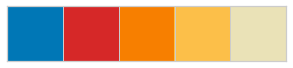

In [55]:
green_red_palette = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
blue_yellow_palette=  ['#0077b6', '#d62828', '#f77f00', '#fcbf49', '#eae2b7']
cool_p = ['#f87575', '#ffa9a3', '#b9e6ff', '#5c95ff', '#7e6c6c']
wall_p = ['#e63946', '#f1faee', '#a8dadc', '#457b9d', '#1d3557']

sns.palplot(sns.color_palette(blue_yellow_palette))


sns.set_theme(style='whitegrid', palette=blue_yellow_palette, )
# sns.set_palette(blue_yellow_palette)

## Read the experiments file

In [ ]:
experiment_file = './resnet_36exp.pkl'
df = pd.read_pickle(experiment_file)

df.head()



### Create new columns for representation

- Final accuracy
- Total time taken
- Parallelism

In [103]:
# Set the acc to the final accuracy
df['acc'] = df.accuracy.map(lambda a: a[-1])

# Set the time to the sum of the epoch durations
df['time'] = df.epoch_duration.map(lambda t: t[-1])

# Set the parallelism to the first since it is constant
df.parallelism = df.parallelism.map(lambda l:l[0])

# change -1 to inf so the order is right in the plot
df.k = df.k.map(lambda val: float('inf') if val == -1 else val)

df['global_batch'] = df.batch_size * df.parallelism



In [ ]:
from typing import List

def accum_time(durations: List[float]):
    # print('before', durations)
    for i in range(1, len(durations)):
        durations[i] += durations[i-1]
    return durations
        
df.epoch_duration.map(lambda durs: accum_time(durs))
        

### Plot the Correlations between the K, Batch and Parallelism with time and accuracy

<AxesSubplot:>

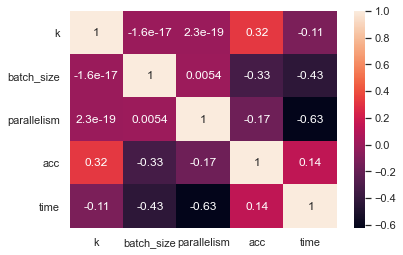

In [43]:


corr = df[['k', 'batch_size', 'parallelism', 'acc', 'time']].corr()
sns.heatmap(corr,
            annot=True,
)

# plt.savefig('./figures/resnet34/heat.png', dpi=300)


In [ ]:
df.sort_values('time')


### Get the max accuracies and times and check the parameters used

In [ ]:
# get the max accuracies
df[['k', 'parallelism', 'acc','batch_size','time']].sort_values(by='time', ascending=True)

## Which of the parameter combinations offer a better bang for the buck

In [ ]:
m = df.loc[df.acc>10].groupby(['k', 'global_batch']).mean()
m['rate'] = m['acc']/m['time']
m.sort_values('rate', ascending=False)[['batch_size','acc', 'time', 'rate']]

## Calculate TTA with different accuracies



In [104]:
# Calculate time to accuracy for different accuracies
def tta_crossbow(acc:int, df: pd.DataFrame):
    """Computes the tta as in the crossbow paper
    where the tta is the median of the last 5 epochs"""

    res = []
    for _, row in df.iterrows():
        done = False
        dur, accuracy = row.epoch_duration, row.accuracy
        for idx, (t, a) in enumerate(zip(dur, accuracy[:len(dur)])):
            
            # if there are less than 5 elements behind, continue
            if idx < 4:
                continue
                
            # calculate the median of the next five elements
            if np.median(accuracy[idx - 4:idx+1]) >= acc:
                res.append(t)
                done = True
                break

        if not done:
            res.append(np.nan)

    return res


def tta(acc:int, df:pd.DataFrame):
    
    
    res = []
    for _, row in df.iterrows():
        done=False
        dur, accuracy = row.epoch_duration, row.accuracy
        for idx, (t, a) in enumerate(zip(dur, accuracy[:len(dur)])):
            if a >= acc:
                res.append(t)
                done = True
                break

        if not done:
            res.append(np.nan)

    return res
        

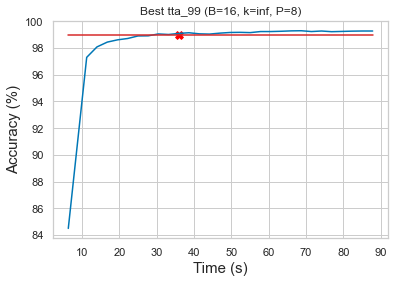

In [105]:

df['tta_99'] = tta(99, df)
df['tta_cross_99'] = tta_crossbow(99, df)



s = df.sort_values('tta_cross_99')[['k', 'batch_size', 'parallelism', 'tta_cross_99', 'tta_99', 'acc', 'accuracy', 'epoch_duration']]

# plot the best
best = s.iloc[0]
best


x = range(1, len(best.accuracy)+1)
plt.figure()
plt.title(f'Best tta_99 (B={best.batch_size}, k={best.k}, P={best.parallelism})')
sns.lineplot(x=best.epoch_duration, y = best.accuracy)
sns.lineplot(x=best.epoch_duration, y= 99)
plt.scatter(best.tta_cross_99, 99, marker='X', s=60, c='r')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)

plt.savefig('./figures/gpu/best.png', dpi=300)


In [100]:
best.tta_cross_99

35.899966737

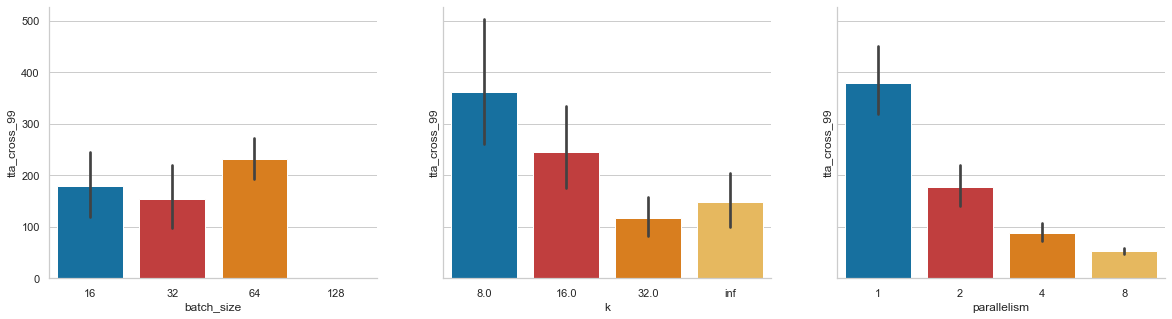

In [108]:
f, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
sns.barplot(x='batch_size', y='tta_cross_99', data=df, ax=ax[0])
sns.barplot(x='k', y='tta_cross_99', data=df, ax=ax[1])
sns.barplot(x='parallelism', y='tta_cross_99', data=df ,ax=ax[2])
sns.despine()

plt.savefig('./figures/gpu/tta_99.png', dpi=300)

# sns.barplot(x='k', y='tta_99', data=df)

## Do ANOVA Linear Model to calculate the influence of the parameters

Using ANOVA we can get an idea of how the different parameters interact with each other and their influence

In [51]:
# For the ANOVA test
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [52]:
def ANOVA(df: pd.DataFrame, y: str, use_all = False,verbose=False):
    """Run the ANOVA analysis with the batch, k and parallelism columns for the 
    given output variable"""
    
    # If use all is true we use all the variables to check either accuracy and time
    # including also the iowait and the cpu to see what fully influences the stuff
    
    
    if not use_all:
        # Plot the summary dataframe
        if verbose:
            display(rp.summary_cont(df.groupby(['batch_size', 'k', 'parallelism']))[y])

        model = ols(f'{y} ~ batch_size*k*parallelism', df).fit()
        
    else:
        if y not in ['acc', 'time']:
            raise ValueError('When use_all = True we predict either final_accuracy or time, not', y)
        if verbose:
            display(rp.summary_cont(df.groupby(['batch_size', 'k', 'parallelism']))[y])

        model = ols(f'{y} ~ cpu*batch*njobs*cpu_mean*iowait_mean', df).fit()
        

    if verbose:
        print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
        display(model.summary())
    
    res = sm.stats.anova_lm(model, typ=2)
    
    return res, model

In [64]:
# df.k = df.k.map(lambda val: -1 if val == float('inf') else val)

res, model = ANOVA(df, y='tta_99', verbose=True)

res

c:\users\diego\cs\qpe\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\users\diego\cs\qpe\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


N      Mean        SD        SE  95% Conf.  \
batch_size k   parallelism                                               
16         -1  1            2  430.5227  184.8758  130.7269 -1230.5202   
               2            3   73.2681   11.6722    6.7389    44.2728   
               4            3   51.8494   10.0766    5.8177    26.8177   
               8            3   31.1736    1.4511    0.8378    27.5688   
            8  1            1  190.4946       NaN       NaN        NaN   
...                        ..       ...       ...       ...        ...   
128         16 8            0       NaN       NaN       NaN        NaN   
            32 1            0       NaN       NaN       NaN        NaN   
               2            0       NaN       NaN       NaN        NaN   
               4            0       NaN       NaN       NaN        NaN   
               8            0       NaN       NaN       NaN        NaN   

                             Interval  
batch_size k   parallelism             
16         -1  1            2091.5656  
               2             102.2634  
               4              76.8811  
               8              34.7784  
            8  1                  NaN  
...                               ...  
128         16 8                  NaN  
            32 1                  NaN  
               2                  NaN  
               4                  NaN  
               8                  NaN  

[64 rows x 6 columns]

Overall model F( 7, 67) =  4.773, p =  0.0002


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tta_99   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     4.773
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           0.000213
Time:                        11:01:56   Log-Likelihood:                -456.03
No. Observations:                  75   AIC:                             928.1
Df Residuals:                      67   BIC:                             946.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  206.3957     57.217      3.607      0.001      92.191     320.601
batch_size                   0.7391      1.442      0.513      0.610      -2.139       3.617
k                            6.2846      3.439      1.828      0.072      -0.579      13.148
batch_size:k                -0.1840      0.106     -1.740      0.087      -0.395       0.027
parallelism                -11.7483     18.329     -0.641      0.524     -48.332      24.836
batch_size:parallelism      -0.6323      0.635     -0.996      0.323      -1.900       0.635
k:parallelism               -1.3451      0.966     -1.393      0.168      -3.273       0.583
batch_size:k:parallelism     0.0487      0.035      1.376      0.173      -0.022       0.119
==============================================================================
Omnibus:                       32.327   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.550
Skew:                           1.562   Prob(JB):                     1.59e-14
Kurtosis:                       6.252   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,sum_sq,df,F,PR(>F)
batch_size,29705.250670,1.0,2.370853,1.283294e-01
k,9290.475151,1.0,0.741497,3.922530e-01
batch_size:k,14282.859994,1.0,1.139952,2.894945e-01
parallelism,383125.921724,1.0,30.578271,5.709075e-07
batch_size:parallelism,206.350605,1.0,0.016469,8.982698e-01
k:parallelism,1251.611859,1.0,0.099894,7.529389e-01
batch_size:k:parallelism,23719.063192,1.0,1.893080,1.734370e-01
Residual,839466.597590,67.0,NaN,NaN


### Plot the distributions of time and accuracy as a function of K, Batch and parallelism

#### Plot the accuracy as a factor

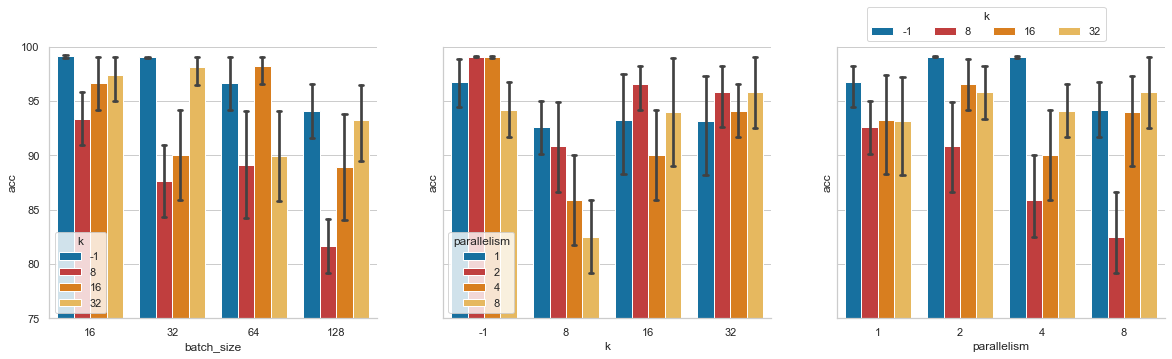

In [97]:
plt.rc('font', size=16)

f, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
sns.barplot(x='batch_size', y='acc', hue='k', data=df, ax=ax[0], capsize=.05)
sns.barplot(x='k', y='acc', data=df, ax=ax[1], capsize=.05, hue='parallelism')
sns.barplot(x='parallelism', y='acc', data=df, hue='k' ,ax=ax[2] ,capsize=.05)
sns.despine()
plt.legend(title='k', ncol=4, bbox_to_anchor=(0.075,1))

for a in ax:
    a.set_ylim([75, 100])



# plt.savefig('./figures/resnet34/accuracy.png', dpi=300)

<AxesSubplot:xlabel='parallelism', ylabel='tta_cross_99'>

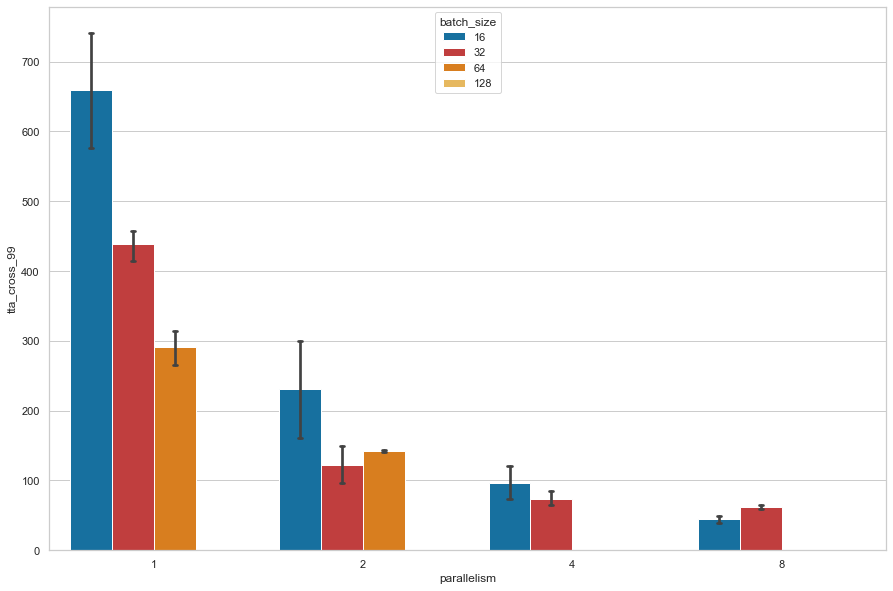

In [98]:
plt.rc('font', size=16)
plt.figure(figsize=(15,10))
sns.barplot(x='parallelism', y='tta_cross_99', data=df, capsize=.02, hue='batch_size')


# plt.savefig('./figures/resnet34/acc_per_k_and_parallelism.png', dpi=300)

#### Plot the time as a factor

<AxesSubplot:xlabel='parallelism', ylabel='time'>

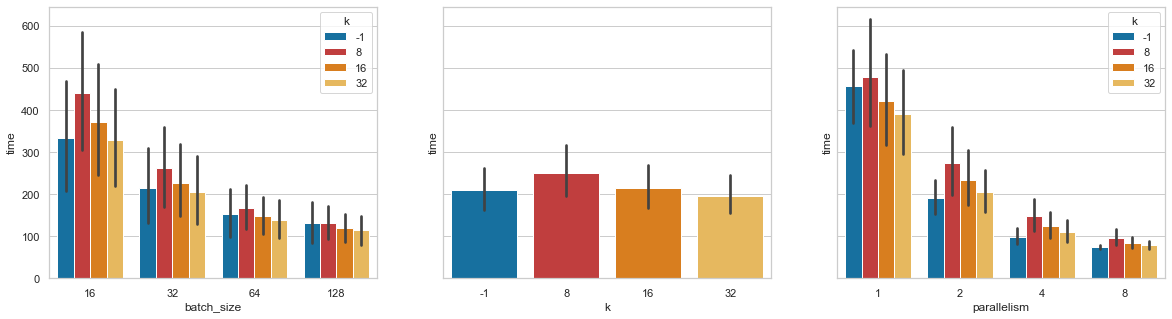

In [99]:
f, ax = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
sns.barplot(x='batch_size', y='time', hue='k', data=df, ax=ax[0])
sns.barplot(x='k', y='time', data=df, ax=ax[1])
sns.barplot(x='parallelism', y='time', data=df, ax=ax[2], hue='k')

# plt.savefig('./figures/resnet34/time.png', dpi=300)

plt.rc('font', size=16)
f, ax = plt.subplots(1, 3, figsize=(20,8), sharey=True)
sns.barplot(x='k', y='time', data=df.loc[df.batch_size==32], capsize=.05, hue='parallelism', ax=ax[0])
sns.barplot(x='k', y='time', data=df.loc[df.batch_size==64], capsize=.05, hue='parallelism', ax=ax[1])
sns.barplot(x='k', y='time', data=df.loc[df.batch_size==128], capsize=.05, hue='parallelism', ax=ax[2])

plt.savefig('./figures/resnet34/time_per_all.png', dpi=300)

In [ ]:
# Plot the validation lines of k=-1 and batch = 32 with different parallelism
def plot_loss_with_k_and_batch(k: int, batch:int, ax: plt.Axes = None):
    d = df.loc[(df.k==k) & (df.batch_size==batch)].sort_values(by='parallelism', ascending=False)

    plt.rc('font', size=13)
    if ax is None:
        f = plt.figure(figsize=(10, 5))
        for _, row in d.iterrows():
#             print(row.accuracy)
            plt.plot(range(1,6), row.accuracy[:-1] if len(row.accuracy) == 6 else row.accuracy, label=str(row.parallelism))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'Accuracy evolution with LeNet (batch={batch}, k={k})')
        plt.legend(title='parallelism', bbox_to_anchor=(1.05, 0.8))
        
    else:
        for _, row in d.iterrows():
#             print(row.accuracy)
            ax.plot(range(1,6), row.accuracy[:-1] if len(row.accuracy) == 6 else row.accuracy, label=str(row.parallelism))
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy (%)')
        ax.set_title(f'Batch={batch}, k={k}')
        ax.legend(title='parallelism')
        

f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15), sharex=True)

plt.suptitle('Behavior of K, Parallelism and Batch in Accuracy')

plot_loss_with_k_and_batch(k=8, batch=32, ax=axes[0][0])
plot_loss_with_k_and_batch(k=16, batch=32, ax=axes[0][1])   
plot_loss_with_k_and_batch(k=64, batch=32, ax=axes[0][2])
    
plot_loss_with_k_and_batch(k=8, batch=64, ax=axes[1][0])
plot_loss_with_k_and_batch(k=16, batch=64, ax=axes[1][1])   
plot_loss_with_k_and_batch(k=64, batch=64, ax=axes[1][2])

plot_loss_with_k_and_batch(k=8, batch=128, ax=axes[2][0])
plot_loss_with_k_and_batch(k=16, batch=128, ax=axes[2][1])   
plot_loss_with_k_and_batch(k=64, batch=128, ax=axes[2][2])


# plt.savefig('./figures/accuracy_study.png', dpi=300)


#### Keep Parallelism and batch set, vary K

#### Keep K and Batch set, vary parallelism

In [ ]:
# Plot the validation lines of k=-1 and batch = 32 with different parallelism
def plot_loss_with_k_and_batch(k: int, batch:int, ax: plt.Axes = None):
    d = df.loc[(df.k==k) & (df.batch_size==batch)].sort_values(by='parallelism', ascending=False)

    plt.rc('font', size=13)
    if ax is None:
        f = plt.figure(figsize=(10, 5))
        for _, row in d.iterrows():
#             print(row.accuracy)
            plt.plot(range(1,6), row.accuracy[:-1] if len(row.accuracy) == 6 else row.accuracy, label=str(row.parallelism))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'Accuracy evolution with LeNet (batch={batch}, k={k})')
        plt.legend(title='parallelism', bbox_to_anchor=(1.05, 0.8))
        
    else:
        for _, row in d.iterrows():
#             print(row.accuracy)
            ax.plot(range(1,6), row.accuracy[:-1] if len(row.accuracy) == 6 else row.accuracy, label=str(row.parallelism))
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy (%)')
        ax.set_title(f'Batch={batch}, k={k}')
        ax.legend(title='parallelism')
        

f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15), sharex=True)

plt.suptitle('Behavior of K, Parallelism and Batch in Accuracy')

plot_loss_with_k_and_batch(k=8, batch=32, ax=axes[0][0])
plot_loss_with_k_and_batch(k=16, batch=32, ax=axes[0][1])   
plot_loss_with_k_and_batch(k=64, batch=32, ax=axes[0][2])
    
plot_loss_with_k_and_batch(k=8, batch=64, ax=axes[1][0])
plot_loss_with_k_and_batch(k=16, batch=64, ax=axes[1][1])   
plot_loss_with_k_and_batch(k=64, batch=64, ax=axes[1][2])

plot_loss_with_k_and_batch(k=8, batch=128, ax=axes[2][0])
plot_loss_with_k_and_batch(k=16, batch=128, ax=axes[2][1])   
plot_loss_with_k_and_batch(k=64, batch=128, ax=axes[2][2])


# plt.savefig('./figures/accuracy_study.png', dpi=300)


#### Keep Parallelism and batch set, vary K

In [ ]:
# Plot the validation lines of k=-1 and batch = 32 with different parallelism
def plot_loss_with_parallelism_and_batch(p: int, batch:int, ax: plt.Axes = None):
    d = df.loc[(df.parallelism==p) & (df.batch_size==batch)].sort_values(by='k', ascending=False)
    
    approx_k = (60000/p)/batch

    plt.rc('font', size=16)
    if ax is None:
        f = plt.figure(figsize=(10, 5))
        for _, row in d.iterrows():
#             print(row.accuracy)
            plt.plot(range(1,6), row.accuracy[:-1] if len(row.accuracy) == 6 else row.accuracy, label=str(row.k))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'Accuracy evolution with LeNet (batch={batch}, k={k})')
        plt.legend(title='parallelism', bbox_to_anchor=(1.05, 0.8))
        
    else:
        for _, row in d.iterrows():
            label = str(row.k) if row.k != float('inf') else f'{row.k} ({int(approx_k)})'
            ax.plot(range(1,6), row.accuracy[:-1] if len(row.accuracy) == 6 else row.accuracy, label=label)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy (%)')
        ax.set_title(f'Batch={batch}, Parallelism={p}')
        ax.legend(title='k')
        

f, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20), sharex=True)

plt.suptitle('Behavior of K, Parallelism and Batch in Accuracy')

plot_loss_with_parallelism_and_batch(p=2, batch=32, ax=axes[0][0])
plot_loss_with_parallelism_and_batch(p=4, batch=32, ax=axes[0][1])   
plot_loss_with_parallelism_and_batch(p=8, batch=32, ax=axes[0][2])

plot_loss_with_parallelism_and_batch(p=2, batch=64, ax=axes[1][0])
plot_loss_with_parallelism_and_batch(p=4, batch=64, ax=axes[1][1])   
plot_loss_with_parallelism_and_batch(p=8, batch=64, ax=axes[1][2])

plot_loss_with_parallelism_and_batch(p=2, batch=128, ax=axes[2][0])
plot_loss_with_parallelism_and_batch(p=4, batch=128, ax=axes[2][1])   
plot_loss_with_parallelism_and_batch(p=8, batch=128, ax=axes[2][2])


plt.savefig('./figures/accuracy_study_varying_k.png', dpi=300)

#### Plot 3d dependencies between K and parallelism on time and accuracy

In [ ]:
# f, ax = plt.subplots(1, 2, projection='3d')

f = plt.figure()
ax = f.add_subplot(1, 2, 1, projection='3d')

from scipy.interpolate import griddata
X, Y = np.meshgrid(df.k.map(lambda v: 500 if v == float('inf') else v), df.parallelism)
Z = griddata((df.k.map(lambda v: 500 if v == float('inf') else v),
              df.parallelism),
              df.acc, (X, Y), method='cubic')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=False)


In [ ]:
d = df.loc[df.batch==64]